<a href="https://colab.research.google.com/github/thecronus/mediasMoveis/blob/main/mediasMoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importando as bibliotecas 
import pandas as pd 
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving VALE3.SA.csv to VALE3.SA.csv


In [4]:
#Salvando os cados 
df = pd.read_csv('/content/VALE3.SA.csv')
#Colocando a data como index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Vizualizando
df

,Date,Open,High,Low,Close,Adj Close,Volume
2018-08-27,2018-08-27,54.169998,55.669998,54.169998,55.669998,48.848099,11205300.0
2018-08-28,2018-08-28,55.930000,56.410000,55.070000,55.650002,48.830551,17875600.0
2018-08-29,2018-08-29,55.250000,56.160000,55.139999,55.220001,48.453243,10292800.0
2018-08-30,2018-08-30,55.299999,55.889999,54.400002,54.570000,47.882893,14432500.0
2018-08-31,2018-08-31,54.520000,54.799999,53.310001,53.619999,47.049309,15000000.0
...,...,...,...,...,...,...,...
2021-08-18,2021-08-18,105.739998,105.739998,103.410004,103.410004,103.410004,35379200.0
2021-08-19,2021-08-19,98.660004,100.279999,97.300003,97.510002,97.510002,60456900.0
2021-08-20,2021-08-20,97.589996,99.099998,97.440002,97.550003,97.550003,30250900.0
2021-08-23,2021-08-23,97.559998,97.930000,96.160004,96.199997,96.199997,19773500.0


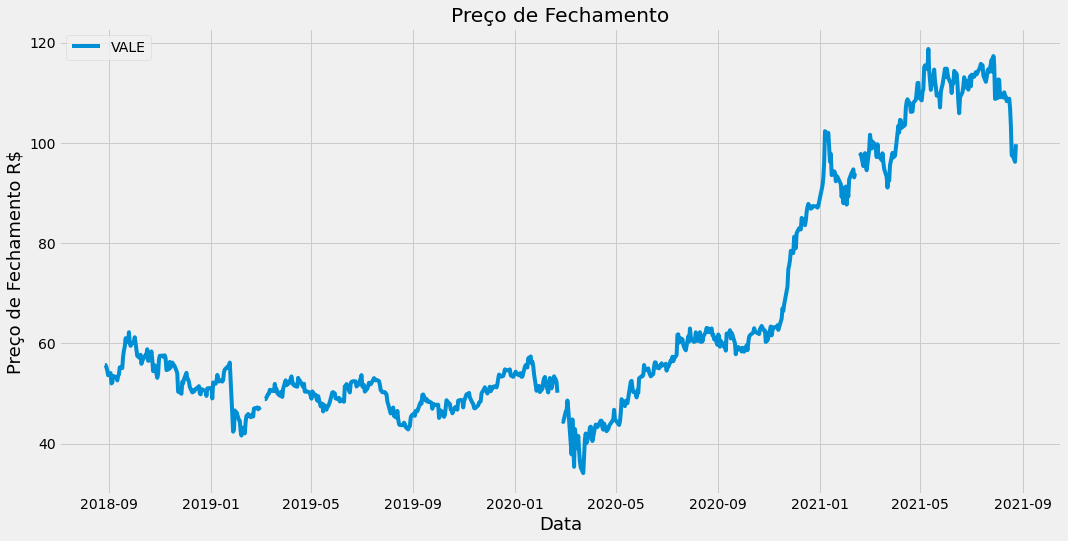

In [5]:
#Vizualizando o gráfico
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label = 'VALE')
plt.title('Preço de Fechamento')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Preço de Fechamento R$',fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [6]:
#Criando uma função para calcular as médias móveis
def SMA(data, period = 30, column ='Close' ):
  return data[column].rolling(window= period).mean()

In [7]:
#Criando a média móvel com 20 e 50 dias 
df['SMA20']=SMA(df, 30)
df['SMA50']=SMA(df, 50)

In [8]:
#Sinais de compra e venda
df['Signal'] = np.where(df['SMA20']>df['SMA50'],1,0)
df['Position'] = df['Signal'].diff()

df['Compra'] = np.where(df['Position']== 1, df['Close'], np.NAN)
df['Venda'] = np.where(df['Position']== -1, df['Close'], np.NAN)

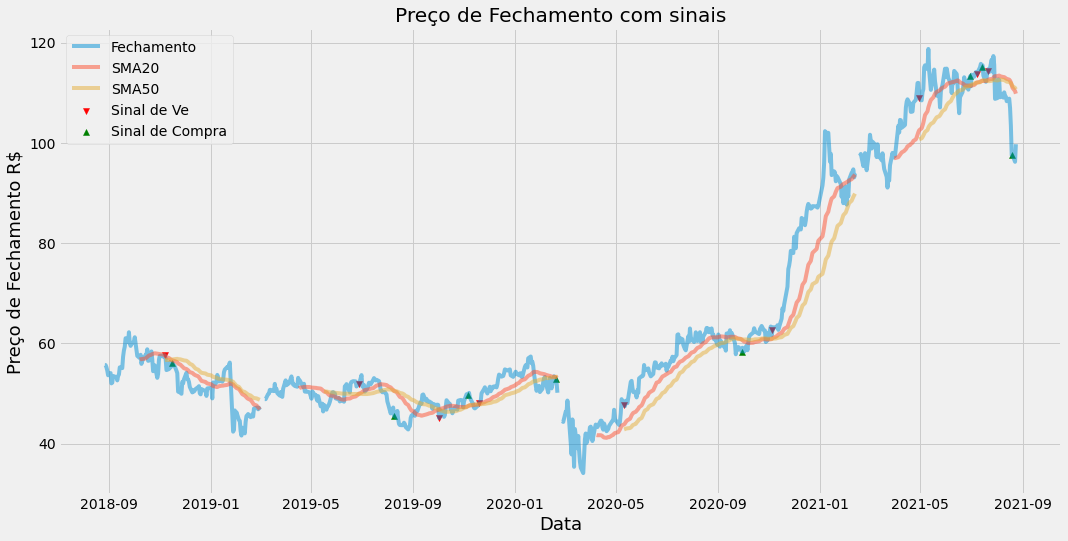

In [9]:
#Vializando com as médias 
plt.figure(figsize=(16,8))
plt.title('Preço de Fechamento com sinais')
plt.plot(df['Close'], label = 'Fechamento', alpha = 0.5)
plt.plot(df['SMA20'], label = 'SMA20', alpha = 0.5)
plt.plot(df['SMA50'], label = 'SMA50', alpha = 0.5)
plt.scatter(df.index, df['Compra'], alpha= 1, label = 'Sinal de Venda', marker ='v', color = 'Red')
plt.scatter(df.index, df['Venda'], alpha= 1, label = 'Sinal de Compra', marker ='^', color = 'Green')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Preço de Fechamento R$',fontsize=18)
plt.legend(loc='upper left')
plt.show()